# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [71]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [73]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [74]:
html = browser.html
html_soup = soup(html, 'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.64)
Stacktrace:
0   chromedriver                        0x0000000103c9cd98 chromedriver + 4869528
1   chromedriver                        0x0000000103c1acf3 chromedriver + 4336883
2   chromedriver                        0x000000010386bc76 chromedriver + 474230
3   chromedriver                        0x0000000103841d0c chromedriver + 302348
4   chromedriver                        0x00000001038da8bf chromedriver + 927935
5   chromedriver                        0x00000001038f0266 chromedriver + 1016422
6   chromedriver                        0x00000001038d5393 chromedriver + 906131
7   chromedriver                        0x000000010389f5af chromedriver + 685487
8   chromedriver                        0x00000001038a0ace chromedriver + 690894
9   chromedriver                        0x0000000103c6aa6e chromedriver + 4663918
10  chromedriver                        0x0000000103c6fbf1 chromedriver + 4684785
11  chromedriver                        0x0000000103c7657f chromedriver + 4711807
12  chromedriver                        0x0000000103c70aea chromedriver + 4688618
13  chromedriver                        0x0000000103c43042 chromedriver + 4501570
14  chromedriver                        0x0000000103c90048 chromedriver + 4816968
15  chromedriver                        0x0000000103c901c7 chromedriver + 4817351
16  chromedriver                        0x0000000103ca4c1f chromedriver + 4901919
17  libsystem_pthread.dylib             0x00007ff800a494e1 _pthread_start + 125
18  libsystem_pthread.dylib             0x00007ff800a44f6b thread_start + 15


In [ ]:
# Create a Beautiful Soup Object


In [ ]:
# Extract all rows of data
table = html_soup.find('table')
data_rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [75]:
# Create an empty list
mars_header_data = []
mars_data = []

for header_text in data_rows[0].find_all('th'):
    mars_header_data.append(header_text.text)


# Loop through the scraped data to create a list of rows
for row in data_rows[1:]:
    bulk_row_data = row.find_all('td')
    row_data = [td.text for td in bulk_row_data]
    mars_data.append(row_data)
    
#Extract Data from the table
data_in_cells = table.find_all('td')
data_in_cells = []

for td in data_in_cells:
    data_in_cells.append(td.text)

In [76]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=mars_header_data)
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [ ]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [80]:
# Examine data type of each column
mars_df.dtypes
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = pd.to_numeric(mars_df['sol'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])
mars_df['id'] = pd.to_numeric(mars_df['id'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])


mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
Terrestrial_Date    datetime64[ns]
dtype: object

In [ ]:
# Change data types for data analysis


In [ ]:
# Confirm type changes were successful by examining data types again


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [84]:
# 1. How many months are there on Mars?
months = mars_df['terrestrial_date'].dt.month.max()
print(f'There are {months} months on Mars')

There are 12 months on Mars


In [85]:
# 2. How many Martian days' worth of data are there?
days_counted = mars_df['sol'].count()
print(f'There are {days_counted} Martian days worth of data')


There are 1867 Martian days worth of data


In [87]:
# 3. What is the average low temperature by month?
average_low = mars_df['min_temp'].mean()
print(f'The average low temperature is {average_low} degrees Celsius')


The average low temperature is -76.12104981253347 degrees Celsius


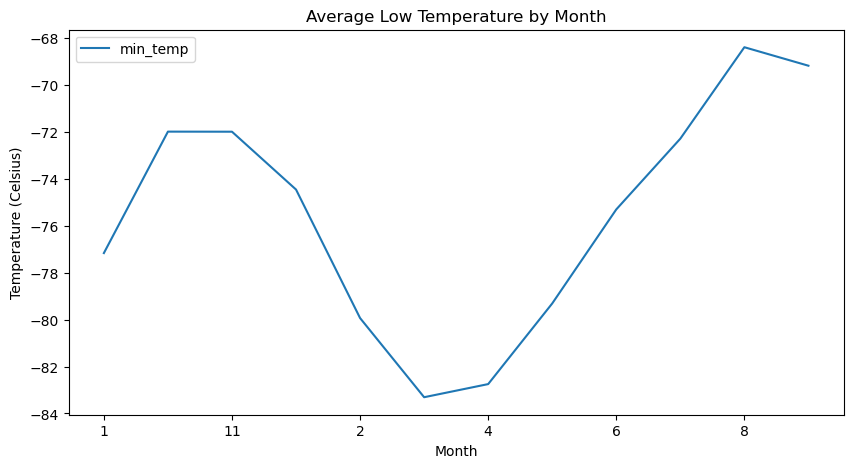

In [93]:
# Plot the average temperature by month
graph = mars_df.groupby('month').mean()

graph.plot(y='min_temp', kind='line', figsize=(10,5))
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')

plt.show()

In [99]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_df.groupby('month')['min_temp'].mean().idxmin()
hottest_month = mars_df.groupby('month')['min_temp'].mean().idxmax()
print(f'The coldest month is {coldest_month} and the hottest month is {hottest_month}')

The coldest month is 3 and the hottest month is 8


In [103]:
# 4. Average pressure by Martian month
average_pressure = mars_df.groupby('month')['pressure'].mean()
print(average_pressure)


month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


<AxesSubplot:title={'center':'Average Pressure by Month'}, xlabel='Month', ylabel='Pressure (Pa)'>

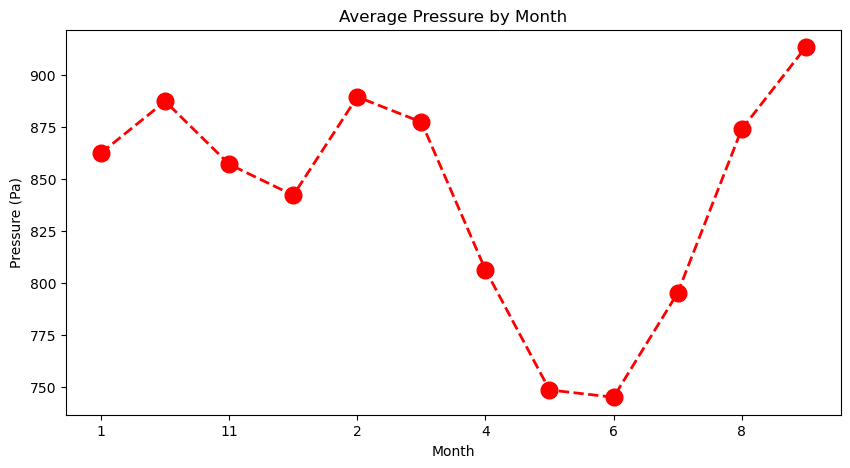

In [110]:
# Plot the average pressure by month
average_pressure.plot(kind='line', figsize=(10,5), color='red', 
                      marker='o', linestyle='dashed', linewidth=2, 
                      markersize=12, title='Average Pressure by Month',
                      ylabel='Pressure (Pa)', xlabel='Month', )


There are approximately 670 terrestrial days in a Martian year


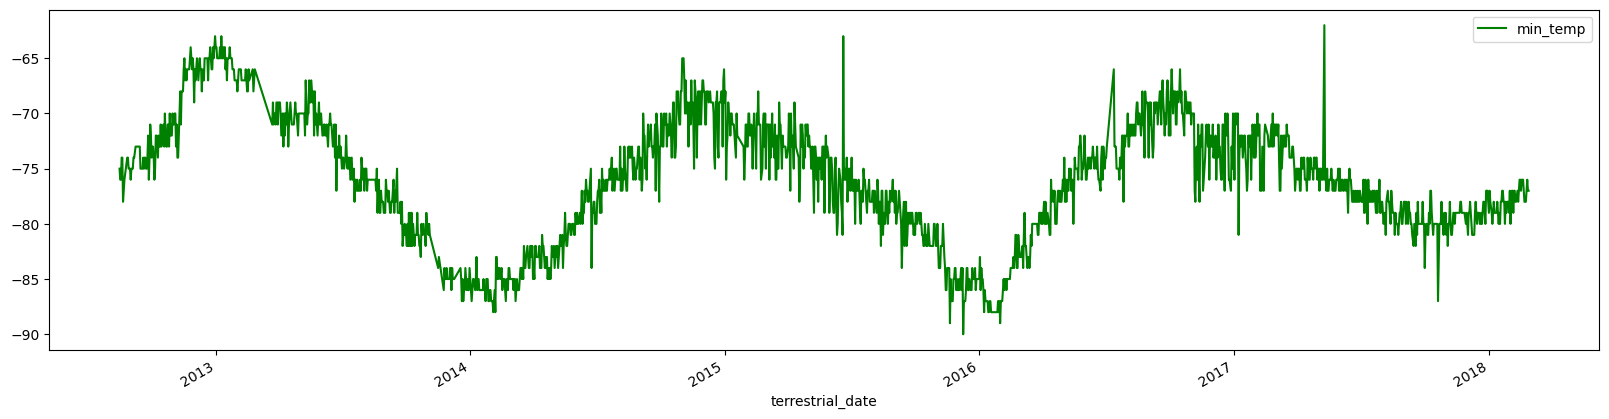

In [129]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#days = mars_df.groupby('month')['min_temp'].mean()
plot = mars_df.plot(x='terrestrial_date', y='min_temp', kind='line', figsize=(20,5), color='green')
        
    
print(f'There are approximately 670 terrestrial days in a Martian year')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [127]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv', index=False)

In [128]:
browser.quit()